In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from IPython.core.interactiveshell import InteractiveShell

plt.style.use('dark_background')
InteractiveShell.ast_node_interactivity = "all"

# Učitavanje podataka



In [3]:
data = pd.read_csv("Employee.csv")

data.head()
data.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [31]:
data.notnull().sum()
data.duplicated().value_counts()

Education                    2764
JoiningYear                  2764
City                         2764
PaymentTier                  2764
Age                          2764
Gender                       2764
EverBenched                  2764
ExperienceInCurrentDomain    2764
LeaveOrNot                   2764
dtype: int64

False    2764
dtype: int64

In [33]:
data["Education"].value_counts()
data["City"].value_counts()
data["Gender"].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

Male      1529
Female    1235
Name: Gender, dtype: int64

In [5]:
data.drop_duplicates(keep = 'first',inplace = True)
data = data.reset_index(drop=True)

In [6]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
2759,Masters,2017,Pune,2,31,Female,No,2,0
2760,Bachelors,2016,Pune,3,30,Male,No,2,0
2761,Masters,2013,Pune,2,37,Male,No,2,1
2762,Masters,2018,New Delhi,3,27,Male,No,5,1


In [7]:
data_encoded = data.copy()

# Graficki prikaz zavisnosti variabla u odnosu na target variablu

In [8]:
fire_rate_per_year = np.array(data[["JoiningYear", "LeaveOrNot"]].groupby("JoiningYear").mean())[:,0]
fire_rate_per_city =  np.array(data[["City", "LeaveOrNot"]].groupby("City").mean())[:,0]
fire_rate_per_gender = np.array(data[["Gender", "LeaveOrNot"]].groupby("Gender").mean())[:,0]
fire_rate_per_edu_tier = np.array(data[["Education", "LeaveOrNot"]].groupby("Education").mean())[:,0]
fire_rate_per_age = np.array(data[["Age", "LeaveOrNot"]].groupby("Age").mean())[:,0]
fire_rate_per_exp_lvl = np.array(data[["ExperienceInCurrentDomain", "LeaveOrNot"]].groupby("ExperienceInCurrentDomain").mean())[:,0]

data[["City", "LeaveOrNot"]].groupby("City").mean()
cities = ["Bangalore", "New Delhi", "Pune"]

data[["Gender", "LeaveOrNot"]].groupby("Gender").mean()
genders = ["Female","Male"]

data[["Education", "LeaveOrNot"]].groupby("Education").mean()
educations = ["Bachelors", "Masters", "PHD"]

,LeaveOrNot
City,
Bangalore,0.350128
New Delhi,0.340909
Pune,0.509363


,LeaveOrNot
Gender,
Female,0.497166
Male,0.310007


,LeaveOrNot
Education,
Bachelors,0.374937
Masters,0.485086
PHD,0.256410


In [9]:
InteractiveShell.ast_node_interactivity = 'last_expr'

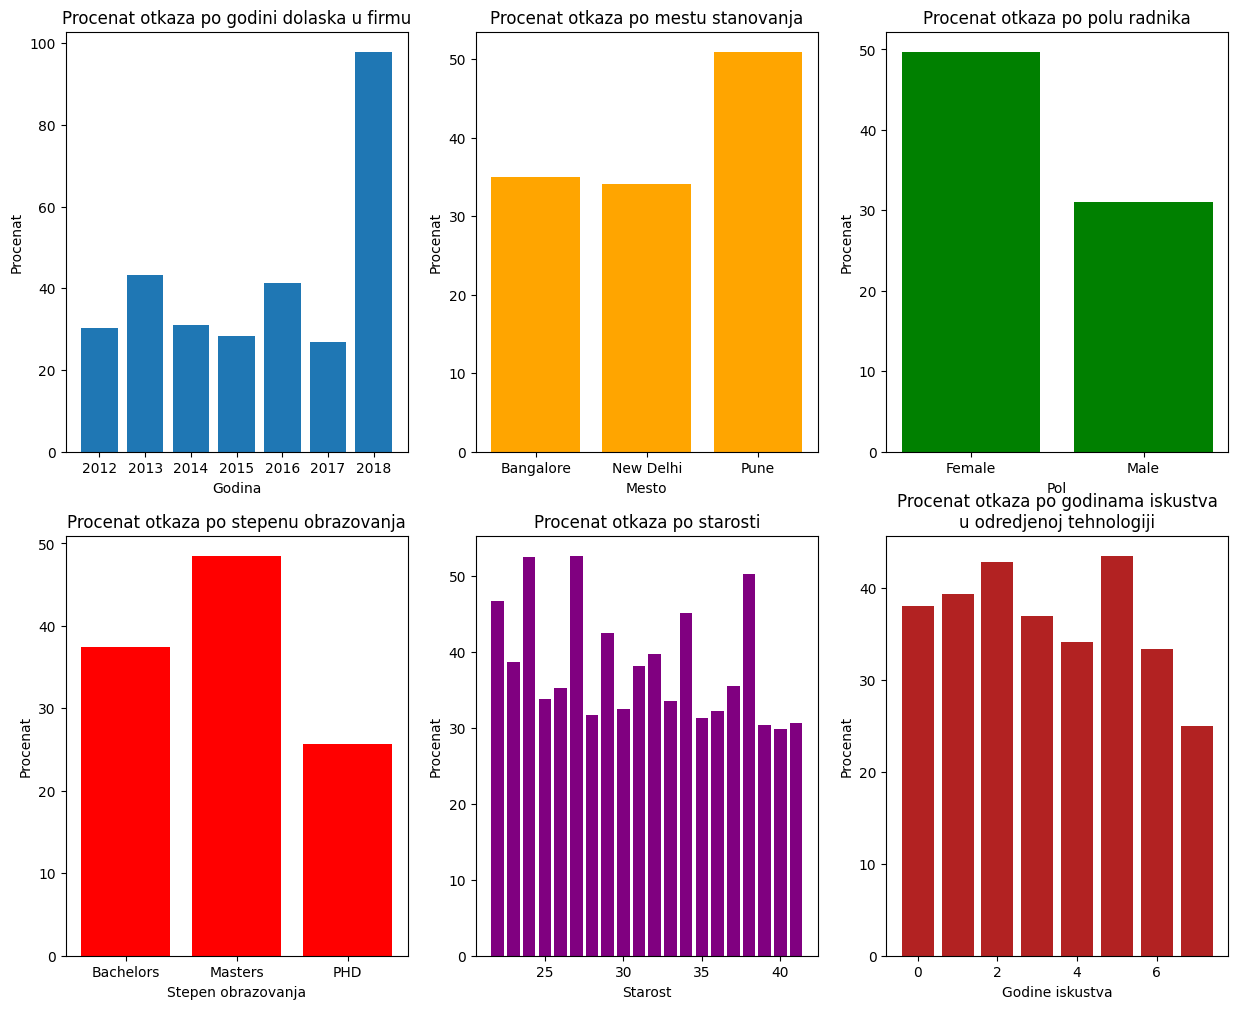

In [10]:
fig, ax = plt.subplots(2,3)

fig.set_figheight(12)
fig.set_figwidth(15)

ax[0,0].bar(data["JoiningYear"].unique(),fire_rate_per_year*100)
ax[0,0].set_title("Procenat otkaza po godini dolaska u firmu")
ax[0,0].set_ylabel("Procenat")
ax[0,0].set_xlabel("Godina")

ax[0,1].bar(cities,fire_rate_per_city*100, color="orange")
ax[0,1].set_title("Procenat otkaza po mestu stanovanja")
ax[0,1].set_ylabel("Procenat")
ax[0,1].set_xlabel("Mesto")

ax[0,2].bar(genders,fire_rate_per_gender*100, color="green")
ax[0,2].set_title("Procenat otkaza po polu radnika")
ax[0,2].set_ylabel("Procenat")
ax[0,2].set_xlabel("Pol")

ax[1,0].bar(educations,fire_rate_per_edu_tier*100, color="red")
ax[1,0].set_title("Procenat otkaza po stepenu obrazovanja")
ax[1,0].set_ylabel("Procenat")
ax[1,0].set_xlabel("Stepen obrazovanja")


ax[1,1].bar(data["Age"].unique(),fire_rate_per_age*100, color="purple")
ax[1,1].set_title("Procenat otkaza po starosti")
ax[1,1].set_ylabel("Procenat")
ax[1,1].set_xlabel("Starost")

ax[1,2].bar(data["ExperienceInCurrentDomain"].unique(),fire_rate_per_exp_lvl*100, color="firebrick")
ax[1,2].set_title("Procenat otkaza po godinama iskustva\n" + "u odredjenoj tehnologiji")
ax[1,2].set_ylabel("Procenat")
ax[1,2].set_xlabel("Godine iskustva")

plt.show()

# Enkodiranje podataka

In [11]:
def object_to_cat(x):
    
    for col in x.select_dtypes(['object']):
        x[col] = x[col].astype("category")

def label_encode(x):
    
    for col in x.select_dtypes(['category']):
        x[col] = x[col].cat.codes

In [12]:
object_to_cat(data_encoded)
label_encode(data_encoded)

# Treniranje modela i ocenivanje, pretraga optimalnih hiperparametara

In [13]:
X = data_encoded.drop(["LeaveOrNot"], axis = 1)
y = data_encoded["LeaveOrNot"]

In [14]:
def grid_search(X,y):

    hyper_param = {
        "criterion": ['gini', 'entropy', 'log_loss'],
        "max_depth" : np.arange(5, 20, 5),
        "min_samples_split": np.arange(2,10,2),
        "min_samples_leaf": np.arange(2,10,2),
        "max_features": np.arange(2, 8, 2),
        "max_leaf_nodes": np.arange(2, 10, 2),
        "ccp_alpha" : np.arange(0,0.5,0.05)
    }

    grid = GridSearchCV(RandomForestClassifier(), hyper_param, cv = 5, n_jobs = 4)
    grid.fit(X, y)
    print(grid.best_params_)

    return grid.best_params_

In [15]:
def call_models(X_train, X_test, y_train, y_test, model ,call_num = 0):

    tree_model = clone(model)

    tree_model.fit(X_train, y_train)

    print("Unakrsna validacija:",cross_val_score(tree_model, X_train, y_train, cv = 5))
    predictions = tree_model.predict(X_test)


    print("Tačnost ", model.__class__.__name__, " pre podešavanja hiperparametara: ", "%.2f" % accuracy_score(y_test,predictions))
    print("Odziv", model.__class__.__name__, " nakon podešavanja hiperparametara: ", "%.2f" % recall_score(y_test,predictions))
    print("Preciznost", model.__class__.__name__, " pre podešavanja hiperparametara: ", "%.2f" % precision_score(y_test,predictions))
    print("F1 score", model.__class__.__name__, " pre podešavanja hiperparametara: ", "%.2f" % f1_score(y_test,predictions))

    print("\n")



    #hypers = grid_search(X_train, y_train)
    if model.__class__.__name__ == "RandomForestClassifier":
        if call_num == 1:
            hypers = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
            
        elif call_num == 2:
            hypers = {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}
            
        elif call_num == 3:
            hypers = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}
        

        grid_model = clone(model)

        grid_model.ccp_alpha = hypers['ccp_alpha']
        grid_model.criterion = hypers['criterion']
        grid_model.max_depth = hypers['max_depth']
        grid_model.max_leaf_nodes = hypers['max_leaf_nodes']
        grid_model.min_samples_split = hypers['min_samples_split']

        grid_model.fit(X_train, y_train)

        print("Unakrsna validacija:", cross_val_score(grid_model, X_train, y_train, cv = 5))
        grid_predictions = grid_model.predict(X_test)

        print("Tačnost", model.__class__.__name__, " modela nakon podešavanja hiperparametara: ","%.2f" % accuracy_score(y_test,grid_predictions))
        print("Odziv", model.__class__.__name__, " nakon podešavanja hiperparametara: ", "%.2f" % recall_score(y_test,grid_predictions))
        print("Preciznost", model.__class__.__name__, " nakon podešavanja hiperparametara: ", "%.2f" % precision_score(y_test,grid_predictions))
        print("F1 score", model.__class__.__name__, " nakon podešavanja hiperparametara: ", "%.2f" % f1_score(y_test,grid_predictions))

        fig, ax = plt.subplots(1,2)
        
        cnf_mtrx_grid = confusion_matrix(y_test, grid_predictions)

        ax[1].set_title("Matrica konfuzije nakon podešavanja hiperparametara")
        cnf_mtrx_dsp_grid = ConfusionMatrixDisplay(cnf_mtrx_grid, display_labels=[False, True]).plot(ax = ax[1])

        cnf_mtrx = confusion_matrix(y_test, predictions)


        ax[0].set_title("Matrica konfuzije pre podešavanja hiperparametara")
        cnf_mtrx_dsp = ConfusionMatrixDisplay(cnf_mtrx, display_labels=[False, True]).plot(ax = ax[0])

    else:
        fig, ax = plt.subplots()

        cnf_mtrx = confusion_matrix(y_test, predictions)
        ax.set_title("Matrica konfuzije pre podešavanja hiperparametara")
        cnf_mtrx_dsp = ConfusionMatrixDisplay(cnf_mtrx, display_labels=[False, True]).plot(ax = ax)


    fig.set_figheight(8)
    fig.set_figwidth(18)


    plt.show()
    if model.__class__.__name__ == "RandomForestClassifier":
        return [tree_model, grid_model]
    else:
        return tree_model

Unakrsna validacija: [0.74939759 0.73493976 0.74698795 0.74637681 0.76086957]
Tačnost  RandomForestClassifier  pre podešavanja hiperparametara:  0.71
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.60
Preciznost RandomForestClassifier  pre podešavanja hiperparametara:  0.65
F1 score RandomForestClassifier  pre podešavanja hiperparametara:  0.62


Unakrsna validacija: [0.75421687 0.7373494  0.7686747  0.75845411 0.75603865]
Tačnost RandomForestClassifier  modela nakon podešavanja hiperparametara:  0.75
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.42
Preciznost RandomForestClassifier  nakon podešavanja hiperparametara:  0.90
F1 score RandomForestClassifier  nakon podešavanja hiperparametara:  0.57


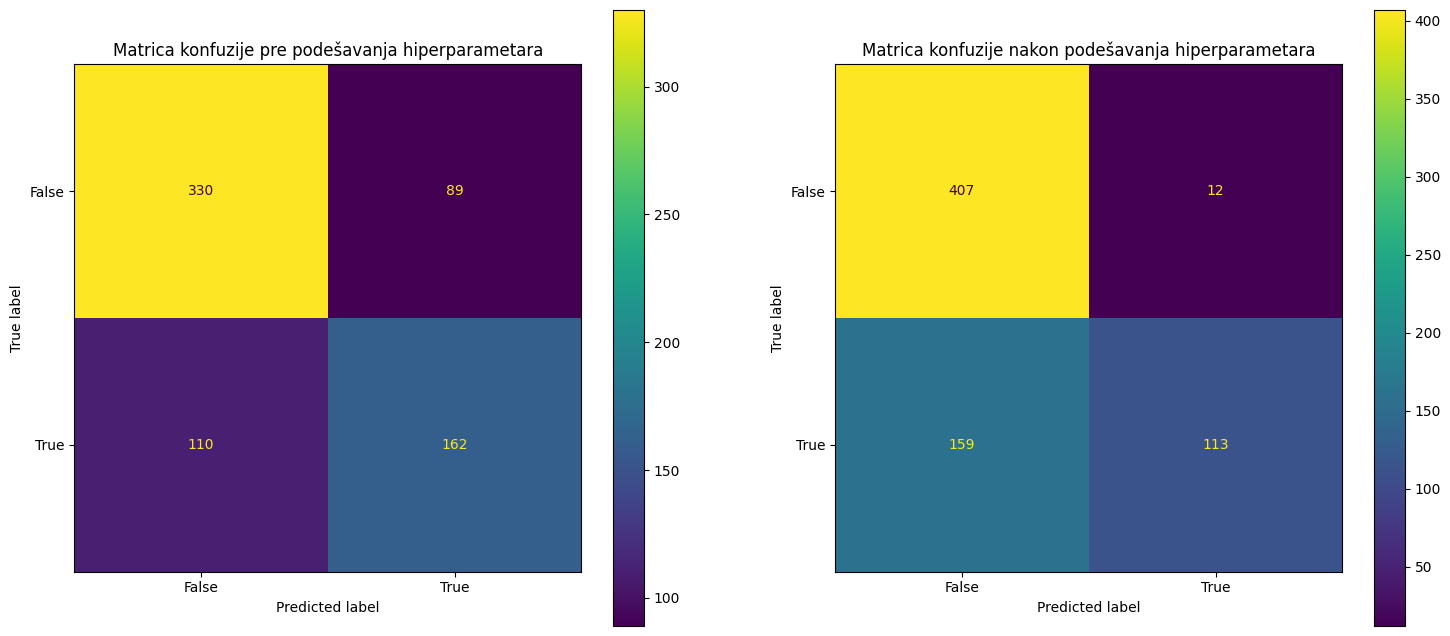

In [34]:
X1_train, X1_test, y_train, y_test = train_test_split(X,y,stratify = y)
#{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
[tree_1, grid_1] = call_models(X1_train, X1_test, y_train, y_test, call_num = 1, model = RandomForestClassifier())

Unakrsna validacija: [0.67710843 0.67951807 0.65060241 0.65700483 0.6884058 ]
Tačnost  KNeighborsClassifier  pre podešavanja hiperparametara:  0.67
Odziv KNeighborsClassifier  nakon podešavanja hiperparametara:  0.47
Preciznost KNeighborsClassifier  pre podešavanja hiperparametara:  0.60
F1 score KNeighborsClassifier  pre podešavanja hiperparametara:  0.53




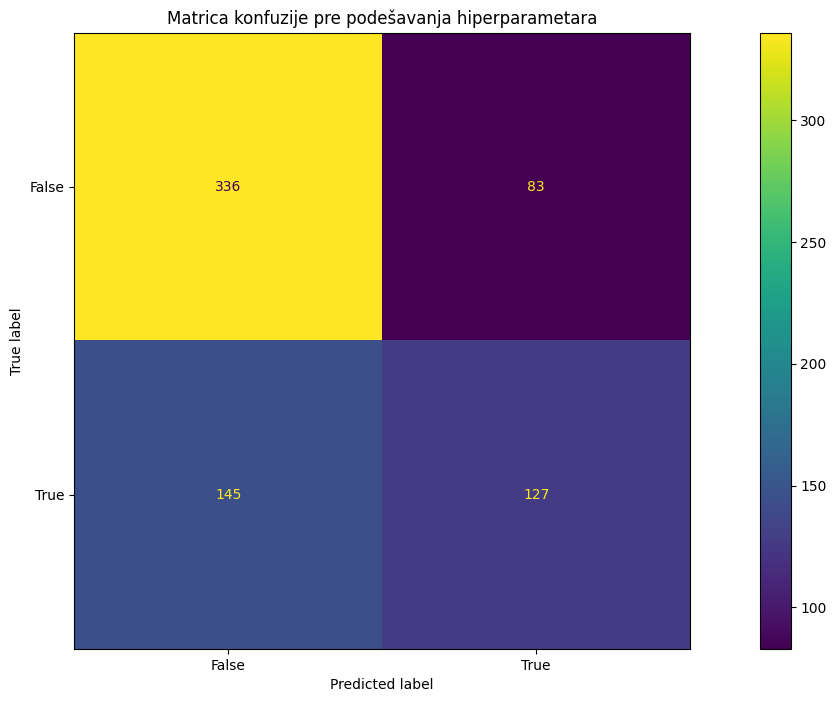

In [17]:
_ = call_models(X1_train, X1_test, y_train, y_test, call_num = 1, model = KNeighborsClassifier())

# Algoritmi za odabir najbitnih atributa

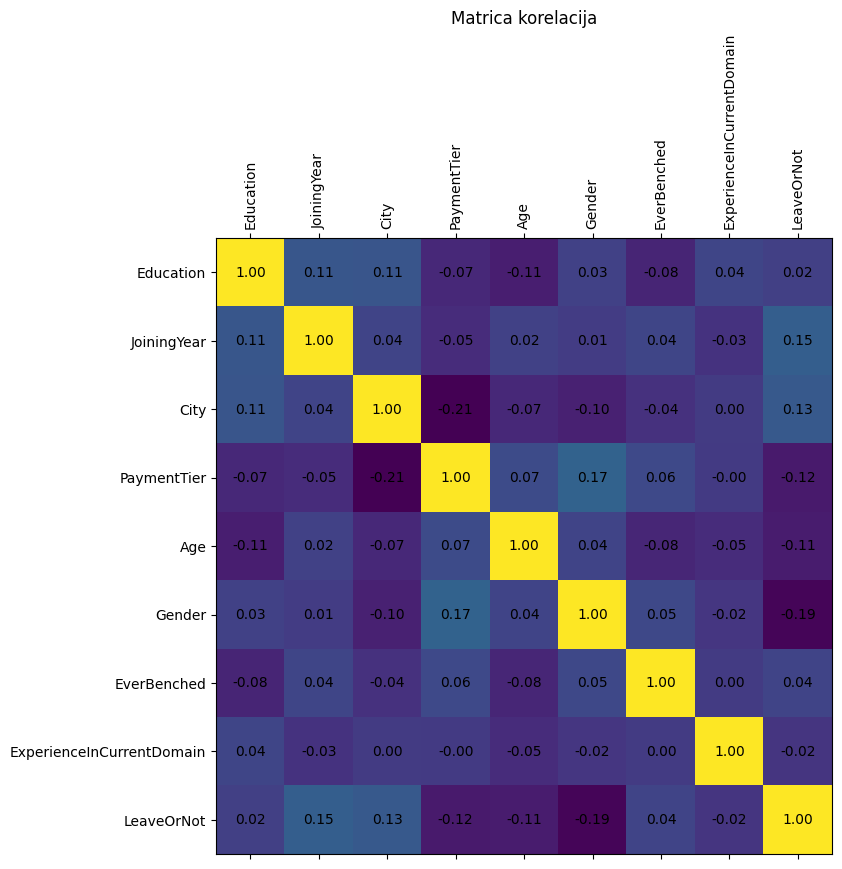

In [18]:
fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(18)

ax.matshow(data_encoded.corr())
ax.set_title("Matrica korelacija")
ax.set_xticks(np.arange(len(data_encoded.columns)))
ax.set_yticks(np.arange(len(data_encoded.columns)))
ax.set_xticklabels(data_encoded.columns, fontdict=None, minor = False, rotation = "vertical")
ax.set_yticklabels(data_encoded.columns, fontdict=None, minor = False)

xd = np.array(data_encoded.corr())

for (i, j), z in np.ndenumerate(xd):
    ax.text(j ,i , '{:0.2f}'.format(z) , ha = "center", va = "center")


plt.show()

In [19]:
categorical_features = [0,2,3,4,5,6]

mut_inf =  mutual_info_classif(X,y, discrete_features=categorical_features, n_neighbors=5)

for i in range(len(X.columns)):
    print(X.columns[i], ": ","%.2f"% mut_inf[i])

Education :  0.01
JoiningYear :  0.09
City :  0.01
PaymentTier :  0.02
Age :  0.01
Gender :  0.02
EverBenched :  0.00
ExperienceInCurrentDomain :  0.00


Unakrsna validacija: [0.77590361 0.75662651 0.80722892 0.79227053 0.80917874]
Tačnost  RandomForestClassifier  pre podešavanja hiperparametara:  0.81
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.60
Preciznost RandomForestClassifier  pre podešavanja hiperparametara:  0.86
F1 score RandomForestClassifier  pre podešavanja hiperparametara:  0.71


Unakrsna validacija: [0.76626506 0.76144578 0.7686747  0.74154589 0.77536232]
Tačnost RandomForestClassifier  modela nakon podešavanja hiperparametara:  0.76
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.40
Preciznost RandomForestClassifier  nakon podešavanja hiperparametara:  0.98
F1 score RandomForestClassifier  nakon podešavanja hiperparametara:  0.57


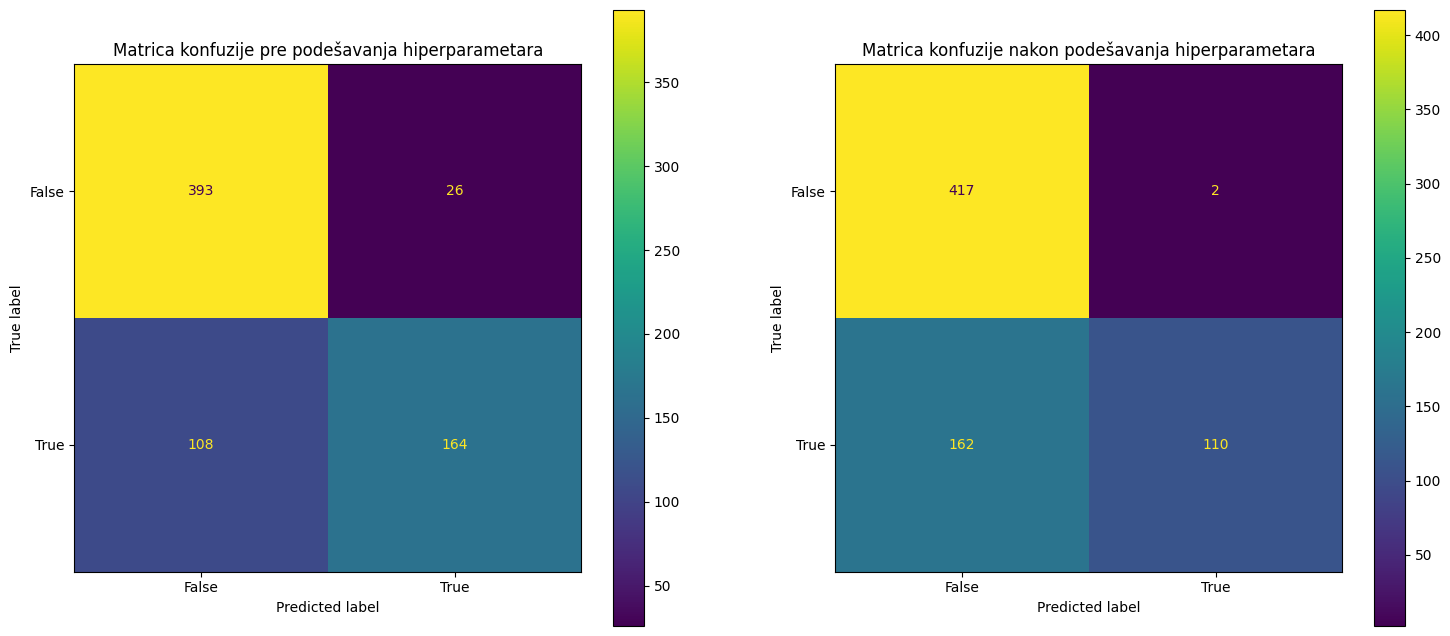

In [20]:
X2_train = X1_train.drop(["Age", "EverBenched", "ExperienceInCurrentDomain"], axis = 1)
X2_test = X1_test.drop(["Age", "EverBenched", "ExperienceInCurrentDomain"], axis = 1)

tree_2, grid_2 = call_models(X2_train, X2_test, y_train, y_test, call_num = 2, model = RandomForestClassifier())
#{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [21]:
select_k_class = SelectKBest(k = 4)
select_k_class.fit(X,y)
column_idx = select_k_class.get_support(indices=True)
X3_train = X1_train.iloc[:, column_idx]
X3_test = X1_test.iloc[:, column_idx]
X3_train

,JoiningYear,City,PaymentTier,Gender
279,2014,2,3,0
2657,2016,2,2,0
1284,2017,2,2,0
2278,2015,0,3,1
2427,2012,0,3,1
...,...,...,...,...
1465,2016,0,3,0
2330,2012,0,3,1
2510,2014,2,3,0
2677,2012,1,3,1


Unakrsna validacija: [0.78313253 0.77108434 0.78313253 0.76570048 0.76811594]
Tačnost  RandomForestClassifier  pre podešavanja hiperparametara:  0.77
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.53
Preciznost RandomForestClassifier  pre podešavanja hiperparametara:  0.82
F1 score RandomForestClassifier  pre podešavanja hiperparametara:  0.64


Unakrsna validacija: [0.79518072 0.7686747  0.75662651 0.72705314 0.7705314 ]
Tačnost RandomForestClassifier  modela nakon podešavanja hiperparametara:  0.76
Odziv RandomForestClassifier  nakon podešavanja hiperparametara:  0.47
Preciznost RandomForestClassifier  nakon podešavanja hiperparametara:  0.86
F1 score RandomForestClassifier  nakon podešavanja hiperparametara:  0.61


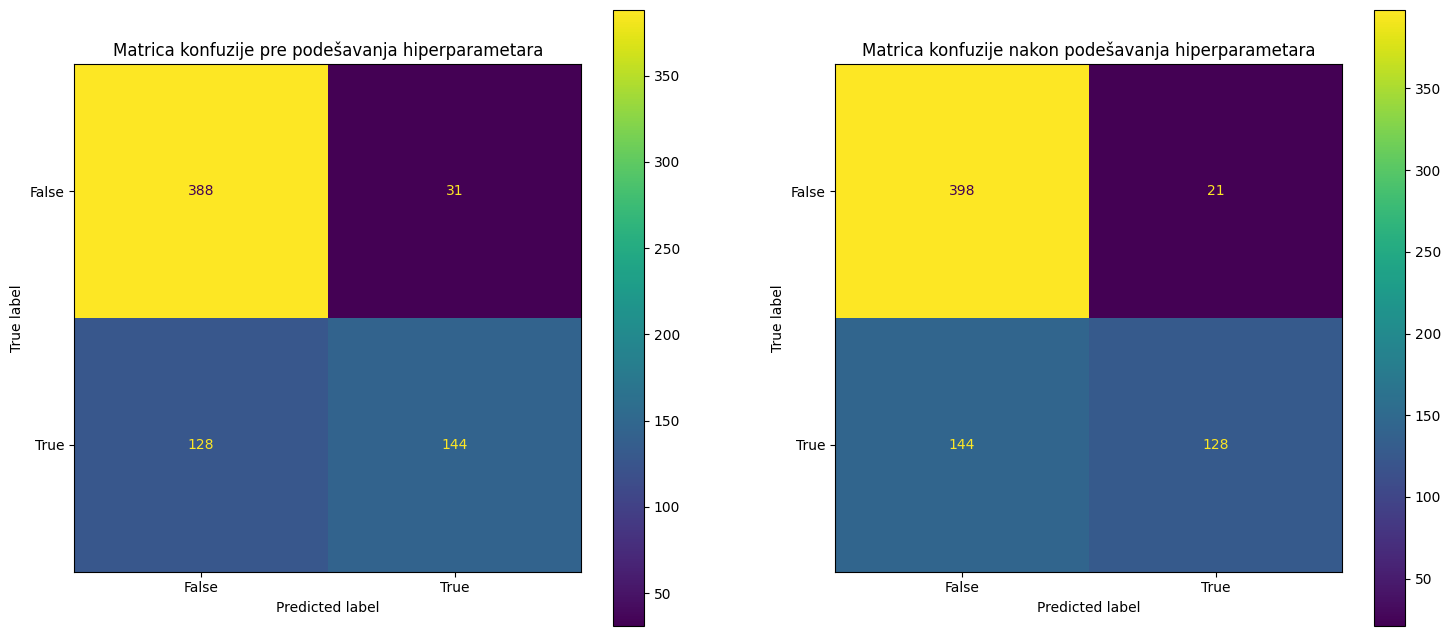

In [22]:
tree_3,grid_3 = call_models(X3_train, X3_test, y_train, y_test, call_num = 3, model = RandomForestClassifier())
#{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}

In [23]:

pred1 = tree_1.predict(X1_test)
pred2 = tree_2.predict(X2_test)

print("Tacnosti svih modela")
print("Obican model:", "%.2f" % accuracy_score(y_test,  pred1))
print("Model sa izbacenim atributima koristeci pd.corr() i mutual_info_classif():", "%.2f" % accuracy_score(y_test, pred2))
print("Model sa izbacenim atributima koristeci SelectKBest():", "%.2f" % accuracy_score(y_test, tree_3.predict(X3_test)))

Tacnosti svih modela
Obican model: 0.74
Model sa izbacenim atributima koristeci pd.corr() i mutual_info_classif(): 0.81
Model sa izbacenim atributima koristeci SelectKBest(): 0.77
